In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
air_quality = pd.read_csv("./data/raw/air_quality_no2_long.csv")

In [6]:
air_quality = air_quality.rename(columns = {'date.utc' : 'datetime'})

In [7]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [8]:
air_quality["datetime"] = pd.to_datetime(air_quality.datetime)

In [10]:
pd.read_csv("./data/raw/air_quality_no2_long.csv", parse_dates=["date.utc"])

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [11]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [12]:
air_quality['datetime'].max() - air_quality['datetime'].min()

Timedelta('44 days 23:00:00')

In [13]:
air_quality.groupby([air_quality['datetime'].dt.weekday, "location"])['value'].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

## Plot typical NO2 pattern during the day of our time series of all staion together.

Text(0, 0.5, '$NO_2 (µg/m^3)$')

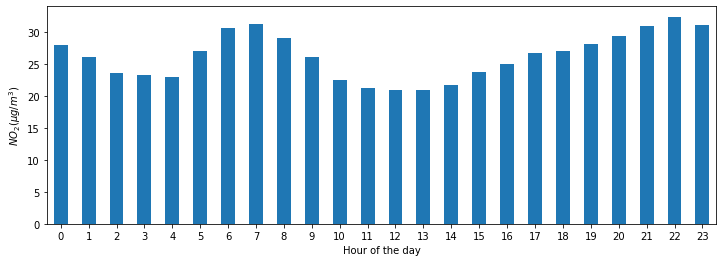

In [23]:
fig, axs = plt.subplots(figsize = (12, 4))
air_quality.groupby([air_quality['datetime'].dt.hour])['value'].mean().plot(kind = 'bar', rot = 0, ax = axs)
plt.xlabel("Hour of the day")
plt.ylabel("$NO_2 (µg/m^3)$")

In [24]:
no_2 = pd.pivot(data=air_quality, index="datetime", columns="location", values="value")

In [26]:
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [30]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

## Create a plot of the NO2 values in the different stations from the 20th of May till the end of 21st May

<AxesSubplot:xlabel='datetime'>

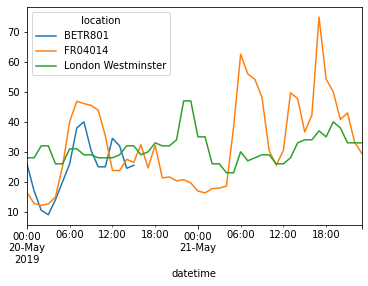

In [31]:
no_2["2019-05-20":"2019-05-21"].plot()

## Resample a tmie series to another frequency

### Agreegate the current hourly time series values to the montly maximum values of the each station

In [32]:
monthly_max = no_2.resample("M").max()

In [33]:
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [35]:
no_2.resample("D").max()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 00:00:00+00:00,50.5,77.7,32.0
2019-05-08 00:00:00+00:00,23.0,48.9,40.0
2019-05-09 00:00:00+00:00,20.5,50.7,97.0
2019-05-10 00:00:00+00:00,11.5,60.7,52.0
2019-05-11 00:00:00+00:00,26.5,36.8,37.0
2019-05-12 00:00:00+00:00,20.0,46.5,44.0
2019-05-13 00:00:00+00:00,14.5,45.2,39.0
2019-05-14 00:00:00+00:00,14.5,46.1,34.0
2019-05-15 00:00:00+00:00,25.5,48.1,38.0


In [38]:
monthly_max.index.freq

<MonthEnd>

<AxesSubplot:xlabel='datetime'>

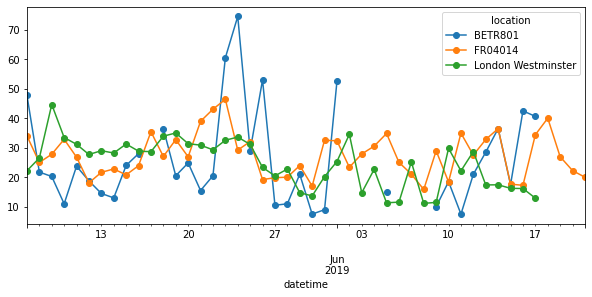

In [39]:
no_2.resample("D").mean().plot(kind = 'line', style = "-o", figsize = (10, 4))